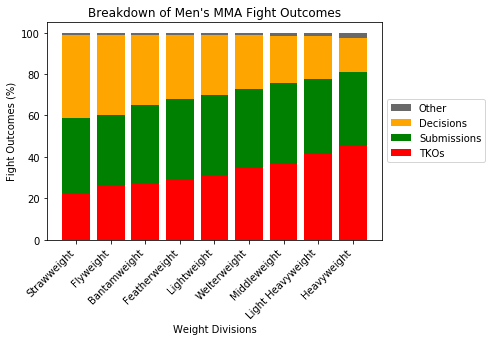

In [1]:
# I used pandas and matplotlib to create segemented bar charts of fight outcomes 
# for each MMA men's weight division.
# Data source: http://www.fightmatrix.com/mma-records-stats/fight-outcomes-by-weight-class/

# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# to see plots in jupyter notebook
%matplotlib inline

# csv copied from http://www.fightmatrix.com/mma-records-stats/fight-outcomes-by-weight-class/
outcomes = pd.read_csv('Fight_Outcomes.csv')

# new cleaned up dataframe with only men's divisions and in ascending order
menoutcomes=outcomes[0:9]
menoutcomes=menoutcomes[::-1]

N = 9

mens_divisions = menoutcomes['Division'][0:9]
tkos = menoutcomes['(T)KOs'][0:9]
submissions = menoutcomes['Submissions'][0:9]
decisions = menoutcomes['Total Decisions'][0:9]
no_contests = menoutcomes['No Contests'][0:9]
dqs = menoutcomes['DQs'][0:9]
unknown = menoutcomes['Unknown'][0:9]

# combine 'No Contests', 'DQs', and 'Unknown' outcomes into one category 'Other'
other = no_contests + dqs + unknown

# total number of fights for each division
total = tkos+submissions+decisions+other

# convert column data from frequency to relative frequency (percentages)
p_tko = np.true_divide(tkos,total)*100
p_sub = np.true_divide(submissions,total)*100
p_dec = np.true_divide(decisions,total)*100
p_oth = np.true_divide(other,total)*100

# create segmented bar chart in matplotlib
index = [x for x, _ in enumerate(mens_divisions)]

plt.bar(index, p_oth, width=0.8, label='Other',\
       color='dimgrey',bottom=p_dec+p_sub+p_tko)
plt.bar(index, p_dec, width=0.8, label='Decisions',\
       color='orange', bottom=p_sub+p_tko)
plt.bar(index, p_sub, width=0.8, label='Submissions',\
       color='green', bottom=p_tko)
plt.bar(index, p_tko, width=0.8, label='TKOs',color='red')

plt.xticks(index,mens_divisions)
plt.ylabel("Fight Outcomes (%)")
plt.xlabel("Weight Divisions")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Breakdown of Men's MMA Fight Outcomes")
plt.ylim=1.0

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()